In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### EDA

In [3]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
df.drop(columns=['month','day'],inplace=True)

In [7]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

### Visulization

C:\Users\Amol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

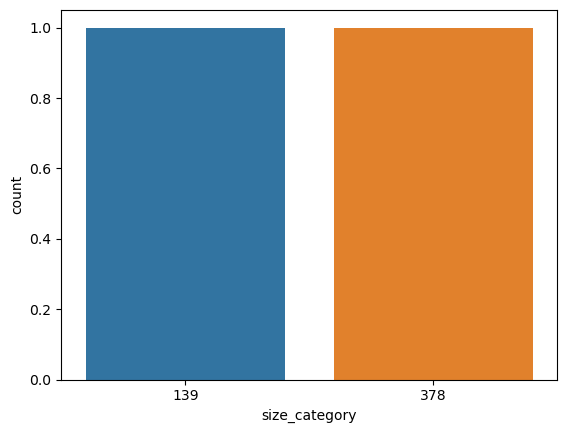

In [8]:
sns.countplot(df['size_category'].value_counts())

### Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
y=le.fit_transform(df['size_category'])

In [11]:
x=df.iloc[:,:-1]


In [12]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)


### Model building

In [15]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [16]:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])

Epoch 1/350
13/13 [==============================] - 4s 54ms/step - loss: 0.8388 - val_loss: 0.7947
Epoch 2/350
13/13 [==============================] - 0s 11ms/step - loss: 0.7898 - val_loss: 0.7606
Epoch 3/350
13/13 [==============================] - 0s 12ms/step - loss: 0.7500 - val_loss: 0.7378
Epoch 4/350
13/13 [==============================] - 0s 12ms/step - loss: 0.7191 - val_loss: 0.7183
Epoch 5/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6922 - val_loss: 0.6997
Epoch 6/350
13/13 [==============================] - 0s 9ms/step - loss: 0.6699 - val_loss: 0.6867
Epoch 7/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6492 - val_loss: 0.6748
Epoch 8/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6296 - val_loss: 0.6635
Epoch 9/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6131 - val_loss: 0.6545
Epoch 10/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6003 - val_loss: 0.6460
Epoch

Epoch 83/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3324 - val_loss: 0.5293
Epoch 84/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3303 - val_loss: 0.5273
Epoch 85/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3278 - val_loss: 0.5272
Epoch 86/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3253 - val_loss: 0.5240
Epoch 87/350
13/13 [==============================] - 0s 6ms/step - loss: 0.3240 - val_loss: 0.5239
Epoch 88/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3215 - val_loss: 0.5202
Epoch 89/350
13/13 [==============================] - 0s 8ms/step - loss: 0.3192 - val_loss: 0.5201
Epoch 90/350
13/13 [==============================] - 0s 7ms/step - loss: 0.3177 - val_loss: 0.5204
Epoch 91/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3153 - val_loss: 0.5192
Epoch 92/350
13/13 [==============================] - 0s 9ms/step - loss: 0.3129 - val_loss: 0.5182


13/13 [==============================] - 0s 8ms/step - loss: 0.1960 - val_loss: 0.4455
Epoch 165/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1951 - val_loss: 0.4450
Epoch 166/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1942 - val_loss: 0.4469
Epoch 167/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1933 - val_loss: 0.4442
Epoch 168/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1924 - val_loss: 0.4375
Epoch 169/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1903 - val_loss: 0.4410
Epoch 170/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1909 - val_loss: 0.4403
Epoch 171/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1895 - val_loss: 0.4372
Epoch 172/350
13/13 [==============================] - 0s 6ms/step - loss: 0.1878 - val_loss: 0.4345
Epoch 173/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1871 - val_loss: 0.4311
Epoc

13/13 [==============================] - 0s 9ms/step - loss: 0.1238 - val_loss: 0.3793
Epoch 246/350
13/13 [==============================] - 0s 6ms/step - loss: 0.1227 - val_loss: 0.3789
Epoch 247/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1220 - val_loss: 0.3777
Epoch 248/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1217 - val_loss: 0.3797
Epoch 249/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1206 - val_loss: 0.3783
Epoch 250/350
13/13 [==============================] - 0s 6ms/step - loss: 0.1200 - val_loss: 0.3761
Epoch 251/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1196 - val_loss: 0.3696
Epoch 252/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1193 - val_loss: 0.3642
Epoch 253/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1190 - val_loss: 0.3639
Epoch 254/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1183 - val_loss: 0.3664
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.0809 - val_loss: 0.3177
Epoch 327/350
13/13 [==============================] - 0s 8ms/step - loss: 0.0804 - val_loss: 0.3195
Epoch 328/350
13/13 [==============================] - 0s 6ms/step - loss: 0.0796 - val_loss: 0.3190
Epoch 329/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0793 - val_loss: 0.3187
Epoch 330/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0794 - val_loss: 0.3079
Epoch 331/350
13/13 [==============================] - 0s 8ms/step - loss: 0.0797 - val_loss: 0.3096
Epoch 332/350
13/13 [==============================] - 0s 9ms/step - loss: 0.0790 - val_loss: 0.3135
Epoch 333/350
13/13 [==============================] - 0s 8ms/step - loss: 0.0785 - val_loss: 0.3125
Epoch 334/350
13/13 [==============================] - 0s 8ms/step - loss: 0.0788 - val_loss: 0.3120
Epoch 335/350
13/13 [==============================] - 0s 7ms/step - loss: 0.0784 - val_loss: 0.3151
Epoc

<AxesSubplot:>

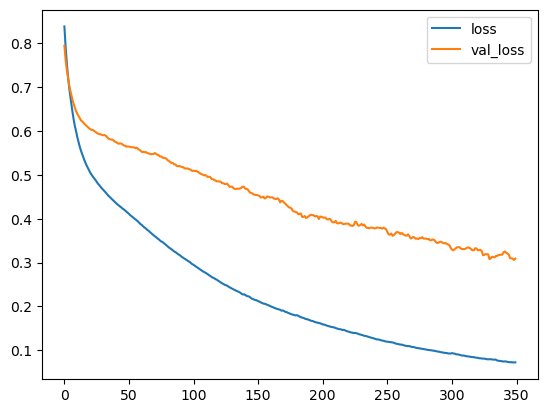

In [17]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [18]:
ypred=ann.predict(xtest)


5/5 [==============================] - 0s 4ms/step


In [19]:
ypred=ypred>0.5

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.93      0.97      0.95        94

    accuracy                           0.92       130
   macro avg       0.92      0.89      0.90       130
weighted avg       0.92      0.92      0.92       130



### Hyperparametertuning

In [21]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [22]:
tunner=kf.RandomSearch(hyper,objective='val_accuracy',max_trials=3)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [23]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

INFO:tensorflow:Oracle triggered exit


In [24]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'units0': 32,
 'activation0': 'relu',
 'optimizer': 'rmsprop',
 'units1': 112,
 'activation1': 'relu',
 'units2': 56,
 'activation2': 'tanh',
 'units3': 64,
 'activation3': 'tanh',
 'units4': 56,
 'activation4': 'tanh',
 'units5': 48,
 'activation5': 'tanh',
 'units6': 128,
 'activation6': 'sigmoid',
 'units7': 112,
 'activation7': 'relu',
 'units8': 16,
 'activation8': 'sigmoid',
 'units9': 64,
 'activation9': 'relu'}

In [25]:
x.shape

(517, 28)

In [26]:
model = tunner.get_best_models(num_models=1)[0]
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                928       
                                                                 
 dense_1 (Dense)             (None, 112)               3696      
                                                                 
 dense_2 (Dense)             (None, 56)                6328      
                                                                 
 dense_3 (Dense)             (None, 64)                3648      
                                                                 
 dense_4 (Dense)             (None, 56)                3640      
                                                                 
 dense_5 (Dense)             (None, 48)                2736      
                                                                 
 dense_6 (Dense)             (None, 128)               6

In [27]:
model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 10ms/step - loss: 0.5247 - accuracy: 0.7881
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8010
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.8036
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4027 - accuracy: 0.8475
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3761 - accuracy: 0.8372
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3854 - accuracy: 0.8372
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.8863
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3558 - accuracy: 0.8656
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 0.8941
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3040 - accuracy: 0.8734
Epoch 11

13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.9948
Epoch 84/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 0.9948
Epoch 85/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 0.9974
Epoch 86/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9897
Epoch 87/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0613 - accuracy: 0.9845
Epoch 88/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9897
Epoch 89/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9974
Epoch 90/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.9948
Epoch 91/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 0.9974
Epoch 92/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 0.9948
Epoch 93/100


In [28]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 4ms/step - loss: 1.3592 - accuracy: 0.8615


[1.3592205047607422, 0.8615384697914124]

In [29]:
ypred=model.predict(xtest)
ypred

5/5 [==============================] - 0s 3ms/step


array([[9.9997735e-01],
       [9.9998277e-01],
       [9.9998170e-01],
       [9.9997139e-01],
       [9.9998039e-01],
       [9.9998146e-01],
       [9.9989021e-01],
       [9.9998373e-01],
       [9.9998301e-01],
       [9.9997991e-01],
       [1.1500059e-02],
       [9.9992156e-01],
       [2.2086817e-05],
       [9.9998295e-01],
       [2.3214461e-01],
       [9.9995357e-01],
       [9.9997991e-01],
       [9.9992192e-01],
       [9.9998116e-01],
       [6.0422739e-05],
       [9.9325520e-01],
       [3.6355355e-05],
       [9.9981815e-01],
       [9.9988365e-01],
       [9.9997258e-01],
       [9.9903309e-01],
       [9.9998337e-01],
       [9.9998206e-01],
       [9.9998003e-01],
       [9.9997592e-01],
       [9.9988961e-01],
       [9.9997330e-01],
       [9.9998128e-01],
       [9.9998260e-01],
       [9.9996316e-01],
       [9.9998331e-01],
       [4.3834745e-05],
       [5.0492084e-04],
       [9.9986482e-01],
       [9.9989456e-01],
       [9.9996489e-01],
       [9.993405

In [30]:
ypred=ypred>0.5
ypred=pd.DataFrame(ypred)

In [31]:
ypred=ypred.replace({True:'Small',False:'Large'})
ypred

,0
0,Small
1,Small
2,Small
3,Small
4,Small
...,...
125,Large
126,Large
127,Large
128,Small


C:\Users\Amol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

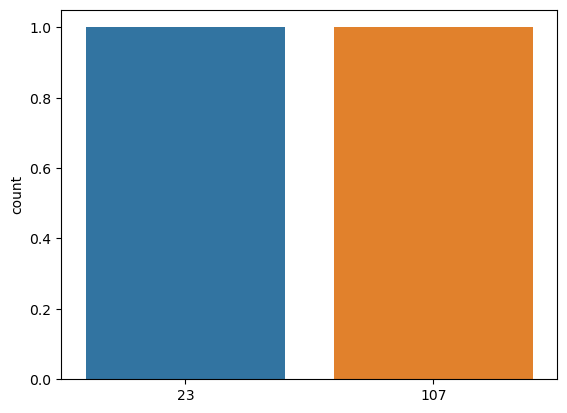

In [32]:
sns.countplot(ypred.value_counts())